In [ ]:
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the data set
#here i have converted my excel data into a data frame
file_path = '/content/adjusted_customer_data.csv'
df = pd.read_csv(file_path)
df.head(5)


,CustomerID,FirstName,LastName,Email,Phone,DateOfBirth,Gender,OrderDate,OrderTime,OrderSource,OrderType,DishOrdered,OrderAmount,FeedbackRating,FeedbackComments
0,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,09/06/2023,9:15:08,POS,Takeout,"Well Tequila Dbl, Absolut Citrus Dbl, HH Red W...",88.95,4,Enjoyed the HH Red Wine Flight. Well-made and ...
1,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,05/01/2023,16:22:35,QR,Takeout,"Bulliet Rye Dbl, Ketel One Dbl",50.00,2,Found the Bulliet Rye Dbl lacking. It's just o...
2,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,16/11/2022,11:42:13,Kiosk,Takeout,Side Fries,6.00,4,Really liked the Side Fries. Quite satisfying.
3,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,25/05/2022,19:42:42,Call-in,Takeout,"HH Mojito Flight, Beer Flight",31.00,2,Beer Flight was mediocre. Could be much better.
4,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,04/05/2022,16:05:42,DoorDash,Takeout,"Coke, Empanada Flight, Empress Dbl",50.95,3,"Empress Dbl was decent, but I've had better."


In [ ]:
#searching for all the missing values in column
print(df.isna().sum())

CustomerID          0
FirstName           0
LastName            0
Email               0
Phone               0
DateOfBirth         0
Gender              0
OrderDate           0
OrderTime           0
OrderSource         0
OrderType           0
DishOrdered         0
OrderAmount         0
FeedbackRating      0
FeedbackComments    0
dtype: int64


In [ ]:
df.columns

Index(['CustomerID', 'FirstName', 'LastName', 'Email', 'Phone', 'DateOfBirth',
       'Gender', 'OrderDate', 'OrderTime', 'OrderSource', 'OrderType',
       'DishOrdered', 'OrderAmount', 'FeedbackRating', 'FeedbackComments'],
      dtype='object')

In [ ]:
##############################################################
# Grouping by CustomerID
grouped_by_customer = df.groupby('CustomerID')
index=0 #@@@@
count=10  #@@@
# Getting an idea of the groups created
for customer_id, group in grouped_by_customer:
    print(f"CustomerID: {customer_id}")
    print(group)  # Displaying the first few rows of each group
    #just to make the display easy remove after that
    index=index+1   #@@@@
    if(index==count): #@@@@
      break #@@@

In [ ]:
####################################################
# Calculate average order amount per customer
#here we are calculating basically what was the average price of the order that every person ordered
avg_order_amount = grouped_by_customer['OrderAmount'].mean().reset_index()
avg_order_amount = avg_order_amount.rename(columns={'OrderAmount': 'AvgOrderAmount'})

# Calculate average feedback rating per customer
avg_feedback_rating = grouped_by_customer['FeedbackRating'].mean().reset_index()
avg_feedback_rating = avg_feedback_rating.rename(columns={'FeedbackRating': 'AvgFeedbackRating'})

# Display the separate average order amount and average feedback rating DataFrames
print(avg_order_amount.head())
print(avg_feedback_rating.head())

In [ ]:
#now here i am gonna be dealing with the rating of every customer that person made
#here we have a data frame that i made to store all the means of feedback made  by every customer
#the data frame is avg_feedback_rating
#------------------------------------------------------------------
#here calculating by the feedback that which customers we are going to loose
#considering the feedback from 1 till 5 than we are definitely going to loose those

In [ ]:
################################################################################
#Finding all those customers which are about to leave our restaurant
grouped_by_customer = df.groupby('CustomerID')

# Initialize an empty dictionary to store CustomerID and average feedback
customer_avg_feedback = {}

# Loop through each customer group
for customer_id, group in grouped_by_customer:
    avg_feedback = group['FeedbackRating'].mean()  # Calculate average feedback rating
    if avg_feedback < 2:
        customer_avg_feedback[customer_id] = avg_feedback

for customer_id, avg_feedback in customer_avg_feedback.items():
    print(f"CustomerID: {customer_id} - Average Feedback: {avg_feedback}")

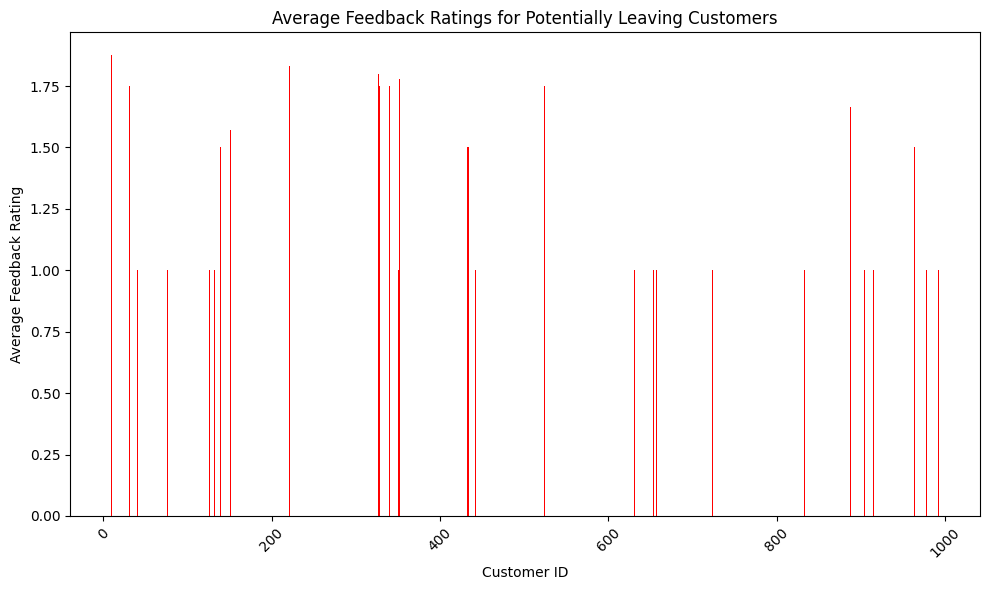

In [ ]:
import matplotlib.pyplot as plt

# Extracting Customer IDs and Average Feedback Ratings
customer_ids = list(customer_avg_feedback.keys())
avg_feedback = list(customer_avg_feedback.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(customer_ids, avg_feedback, color='red')
plt.xlabel('Customer ID')
plt.ylabel('Average Feedback Rating')
plt.title('Average Feedback Ratings for Potentially Leaving Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
csv_file_path = 'adjusted_customer_data.csv'
desired_column_name = 'DishOrdered'
extracted_column = []
with open(csv_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)
    for row in csv_reader:
        column_value = row[desired_column_name]
        extracted_column.append(column_value)
excel_file_path = "Campbell Menu Data - 2.xlsx"
df1 = pd.read_excel(excel_file_path)
items = df1["itemName"]
item_counts = items.value_counts()
most_ordered_item = item_counts.idxmax()

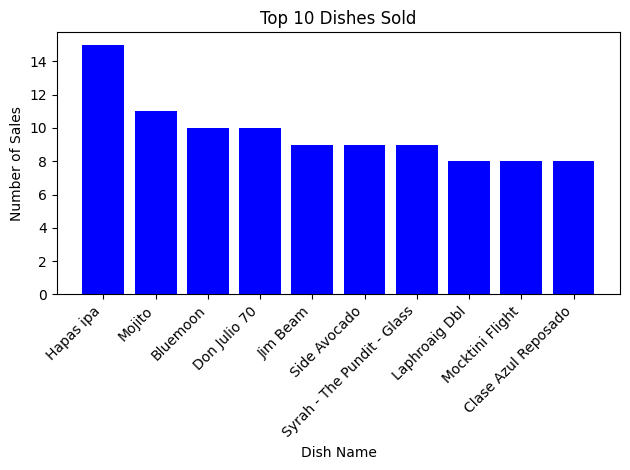

In [ ]:
dish_counts = {}
for dish in extracted_column:
    dish_counts[dish] = dish_counts.get(dish, 0) + 1
top_dishes = sorted(dish_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_dish_names, top_dish_counts = zip(*top_dishes)
plt.bar(top_dish_names, top_dish_counts, color='blue')
plt.xlabel('Dish Name')
plt.ylabel('Number of Sales')
plt.title('Top 10 Dishes Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#########################################################
#time at which customers order food
import pandas as pd
# Convert 'OrderTime' to datetime format if it's not already in datetime format
df['OrderTime'] = pd.to_datetime(df['OrderTime'])

# Extract hour information from the 'OrderTime' column
df['Hour'] = df['OrderTime'].dt.hour


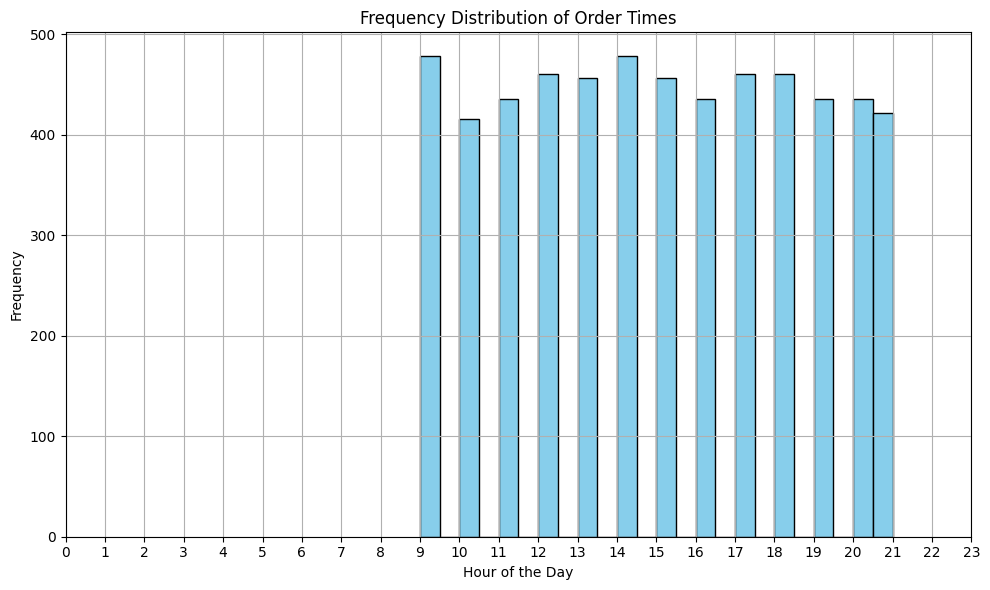

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of order times
plt.figure(figsize=(10, 6))
df['Hour'].hist(bins=24, color='skyblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Order Times')
plt.xticks(range(0, 24))  # Set ticks for each hour
plt.tight_layout()
plt.show()


In [ ]:
##################################################################################
#---------------------------------------------------------------------------------
#people you takeout are more -----drive throughs--------
# Grouping by 'CustomerID' and finding the mode of 'OrderType' for each customer
mode_order_types_per_customer = df.groupby('CustomerID')['OrderType'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Displaying the most common OrderType for each CustomerID
for customer_id, mode_order_type in mode_order_types_per_customer.items():
    print(f"CustomerID: {customer_id} - Most Common OrderType: {mode_order_type}")



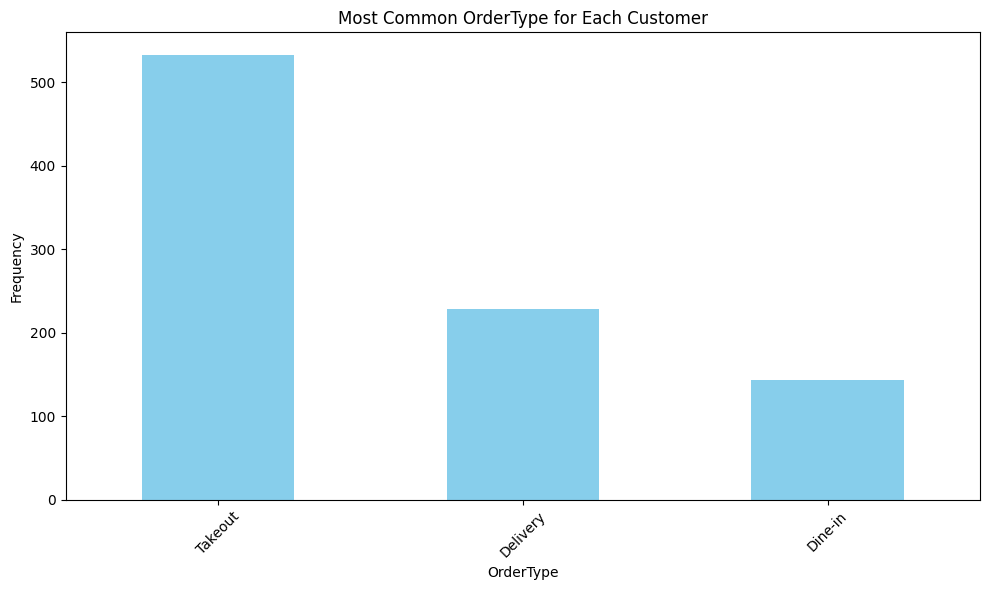

In [ ]:
import matplotlib.pyplot as plt

# Grouping by 'CustomerID' and finding the mode of 'OrderType' for each customer
mode_order_types_per_customer = df.groupby('CustomerID')['OrderType'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Counting the occurrences of each mode OrderType
order_type_counts = mode_order_types_per_customer.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
order_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('OrderType')
plt.ylabel('Frequency')
plt.title('Most Common OrderType for Each Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


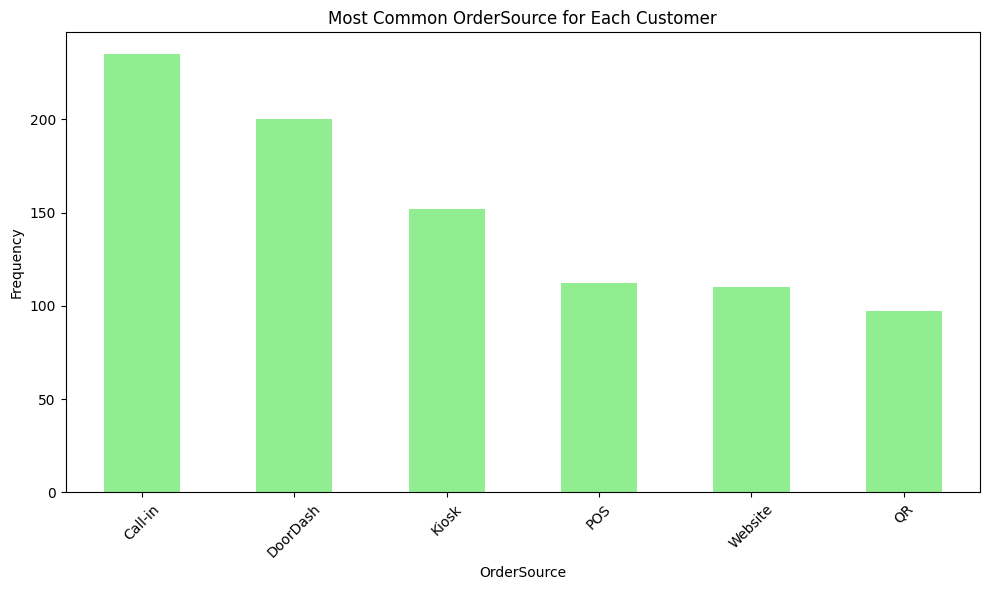

In [ ]:
#################################################################
#call in people are more
import matplotlib.pyplot as plt
# Grouping by 'CustomerID' and finding the mode of 'OrderSource' for each customer
mode_order_sources_per_customer = df.groupby('CustomerID')['OrderSource'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Counting the occurrences of each mode OrderSource
order_source_counts = mode_order_sources_per_customer.value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
order_source_counts.plot(kind='bar', color='lightgreen')
plt.xlabel('OrderSource')
plt.ylabel('Frequency')
plt.title('Most Common OrderSource for Each Customer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


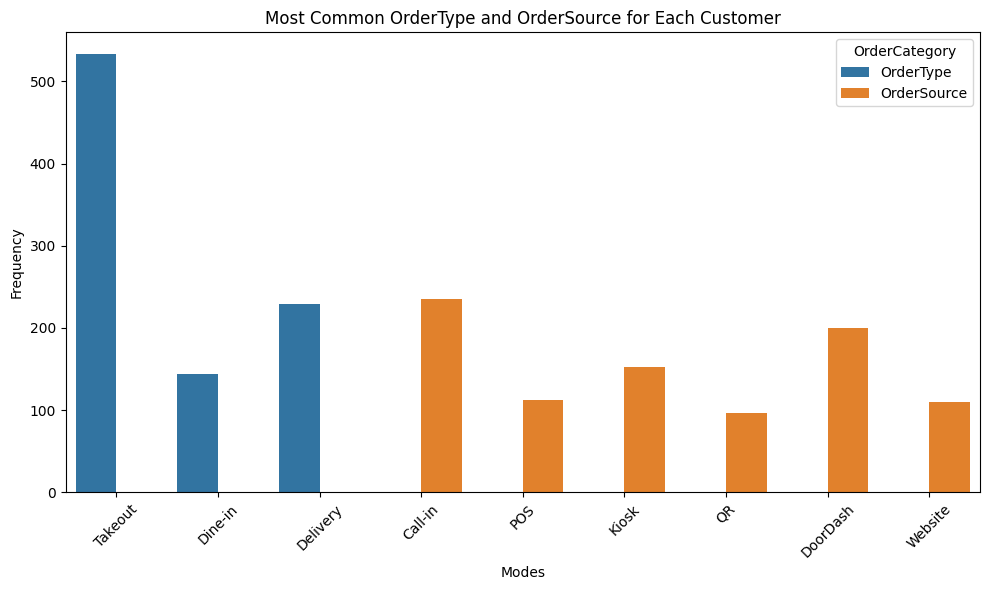

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by 'CustomerID' and finding the mode of 'OrderType' and 'OrderSource' for each customer
mode_order_types_per_customer = df.groupby('CustomerID')['OrderType'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)
mode_order_sources_per_customer = df.groupby('CustomerID')['OrderSource'].agg(lambda x: x.mode()[0] if len(x.mode()) > 0 else None)

# Creating a DataFrame with the modes of OrderType and OrderSource
modes_df = pd.DataFrame({'OrderType': mode_order_types_per_customer, 'OrderSource': mode_order_sources_per_customer})

# Melt the DataFrame to visualize in Seaborn's countplot
melted_modes = modes_df.melt(var_name='OrderCategory', value_name='Mode')

# Plotting using Seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=melted_modes, x='Mode', hue='OrderCategory')
plt.xlabel('Modes')
plt.ylabel('Frequency')
plt.title('Most Common OrderType and OrderSource for Each Customer')
plt.xticks(rotation=45)
plt.legend(title='OrderCategory')
plt.tight_layout()
plt.show()



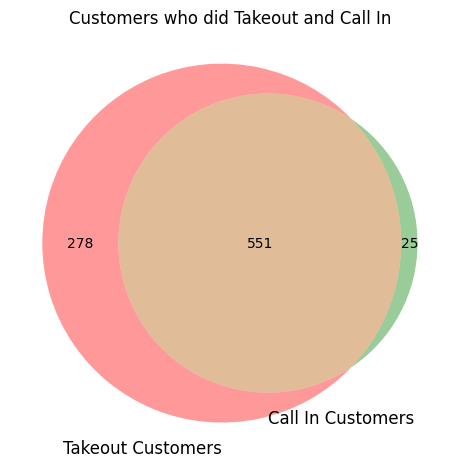

Customers who did both 'Takeout' and 'Call In': 551


In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Calculate unique customers who chose 'Takeout' from 'OrderType'
unique_takeout_customers = set(df[df['OrderType'] == 'Takeout']['CustomerID'])

# Calculate unique customers who chose 'Call In' from 'OrderSource'
unique_call_in_customers = set(df[df['OrderSource'] == 'Call-in']['CustomerID'])

# Calculate customers who did both 'Takeout' and 'Call In'
customers_takeout_and_call_in = unique_takeout_customers.intersection(unique_call_in_customers)

# Plotting a Venn diagram
venn2([unique_takeout_customers, unique_call_in_customers], set_labels=('Takeout Customers', 'Call In Customers'))
plt.title('Customers who did Takeout and Call In')
plt.tight_layout()
plt.show()

# Print count of customers who did both 'Takeout' and 'Call In'
print(f"Customers who did both 'Takeout' and 'Call In': {len(customers_takeout_and_call_in)}")


In [4]:
import csv
import matplotlib.pyplot as plt

# Assuming your CSV file is named 'your_data.csv' and contains columns like 'customer_id', 'order', and 'timeslot'
csv_file_path = 'adjusted_customer_data.csv'
customer_id_column = 'CustomerID'
order_column = 'DishOrdered'
timeslot_column = 'OrderTime'

# Create a dictionary to store orders and timeslots for each customer
customer_orders = {}

# Open the CSV file and read its contents
with open(csv_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    # Iterate through each row and store orders and timeslots for each customer
    for row in csv_reader:
        customer_id = row[customer_id_column]
        order = row[order_column]
        timeslot = row[timeslot_column]

        # Check if the customer ID is already in the dictionary
        if customer_id in customer_orders:
            customer_orders[customer_id]['orders'].append(order)
            customer_orders[customer_id]['timeslots'].append(timeslot)
        else:
            # If the customer ID is not in the dictionary, create a new entry
            customer_orders[customer_id] = {'orders': [order], 'timeslots': [timeslot]}

# Plot a graph for each customer
for customer_id, data in customer_orders.items():
    plt.scatter(data['timeslots'], data['orders'], label=f'Customer {customer_id}')
    plt.xlabel('Timeslot')
    plt.ylabel('Order')
    plt.title(f'Orders for Customer {customer_id} Over Time')
    plt.legend()
    plt.show()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'OrderDate' is the column containing order dates in your DataFrame 'df'
# Convert 'OrderDate' to datetime format if not already in that format
# Example format: 'YYYY-MM-DD'
# Replace problematic values (e.g., 'unknown') with NaN
# Assuming 'OrderDate' contains dates in the format 'day/month/year'
# Splitting the 'OrderDate' column into day, month, and year columns
df[['Day', 'Month', 'Year']] = df['OrderDate'].str.split('/', expand=True)
# Creating a new 'NewOrderDate' column in a standard format ('YYYY-MM-DD')
df['NewOrderDate'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'], errors='coerce')


# Extracting month and year from 'OrderDate'
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

# Grouping by year and month and counting the number of orders
monthly_orders = df.groupby(['Year', 'Month']).size().reset_index(name='Orders')

# Creating a datetime column for plotting
monthly_orders['Date'] = pd.to_datetime(monthly_orders[['Year', 'Month']].assign(day=1))

# Plotting the trend of monthly orders
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders['Date'], monthly_orders['Orders'], marker='o', linestyle='-')
plt.title('Monthly Orders Trend')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources (if not downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Assuming 'FeedbackComments' is the column containing feedback
feedback_texts = df['FeedbackComments'].dropna().tolist()  # Drop NaN values and convert to a list

# Perform sentiment analysis on each feedback comment
sentiments = []

for text in feedback_texts:
    sentiment = sid.polarity_scores(text)['compound']
    sentiments.append(sentiment)

# Calculate sentiment scores
positive_sentiments = [sentiment for sentiment in sentiments if sentiment > 0]
negative_sentiments = [sentiment for sentiment in sentiments if sentiment < 0]
neutral_sentiments = [sentiment for sentiment in sentiments if sentiment == 0]

# Count positive, negative, and neutral sentiments
positive_count = len(positive_sentiments)
negative_count = len(negative_sentiments)
neutral_count = len(neutral_sentiments)

# Display sentiment distribution
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_count, negative_count, neutral_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sentiment Distribution of FeedbackComments')
plt.show()

# Tokenize words in feedback comments
all_words = word_tokenize(' '.join(feedback_texts))

# Count the most common words
word_counts = Counter(all_words)

# Display the top 10 most common words
top_words = word_counts.most_common(10)
print("Top 10 Most Common Words in FeedbackComments:")
for word, count in top_words:
    print(f"{word}: {count} times")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import smtplib

# Load data from CSV file
df = pd.read_csv('adjusted_customer_data.csv')

# Encode categorical features
label_encoder = LabelEncoder()
df['DishOrdered'] = label_encoder.fit_transform(df['DishOrdered'])
df['OrderTime'] = label_encoder.fit_transform(df['OrderTime'])

# Fit the encoder on the training data
label_encoder.fit(df['OrderType'])

# Transform both training and test data
df['OrderType'] = label_encoder.transform(df['OrderType'])

# Features and Target
X = df[['DishOrdered', 'OrderType', 'OrderTime']]
y = np.arange(len(X))  # Use a dummy target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)  # Use the actual target variable y_train

# Make predictions on the entire dataset
df['predicted_index'] = model.predict(X)

# Generate random deals based on the predicted indices
def generate_random_deal(index):
    return f"Special Deal {index}: 15% on your next order!"

df['random_deal'] = df['predicted_index'].apply(generate_random_deal)

# Function to send an email
def send_email(receiver_email, subject, body):
    sender_email = "awaiskhaleequemkh@gmail.com"  # Replace with your email address
    sender_password = "awaisAWM#2002"  # Replace with your email password

    message = MIMEMultipart()
    message['From'] = sender_email
    message['To'] = receiver_email
    message['Subject'] = subject
    message.attach(MIMEText(body, 'plain'))

    with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls()

        try:
            server.login(sender_email, sender_password)
        except smtplib.SMTPAuthenticationError as e:
            print(f"Authentication failed. Make sure your email and password are correct. Error: {e}")
            return

        try:
            server.sendmail(sender_email, receiver_email, message.as_string())
            print(f"Email sent to {receiver_email}")
        except smtplib.SMTPException as e:
            print(f"Error sending email to {receiver_email}: {str(e)}")

# Iterate through the DataFrame and send emails
for index, row in df.iterrows():
    receiver_email = row['Email']  # Replace with the column containing customer emails
    subject = "Special Deal for You!"
    body = row['random_deal']  # Assuming 'random_deal' is the column with the generated deals

    # Print email details for debugging
    print(f"Sending email to: {receiver_email}")
    print(f"Subject: {subject}")
    print(f"Body: {body}")

    try:
        send_email(receiver_email, subject, body)
    except Exception as e:
        print(f"Error sending email to {receiver_email}: {str(e)}")
